Lettuce plant leaf Quality detection ML model training using YOLOv8 ultralytics



## Steps


- Install YOLOv8 and other packages
- Preparing custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model



Step 1: Install Yolov8 and other packages


In [1]:
# Installing necessary pakages

!pip install ultralytics==8.0.134
!pip install opencv-python-headless
from IPython import display
from ultralytics import YOLO
from IPython.display import display, Image
import ultralytics
import os
ultralytics.checks()
HOME = os.getcwd()
print(HOME)

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


/content


Step 2: Preparing Custom Dataset

In [2]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="n4HERXqHARvwTX7ZB9kD")
project = rf.workspace("2-xx7t0").project("disease2-t4gyq")
dataset = project.version(7).download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Succe

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to disease2-7 in yolov8:: 100%|██████████| 7048/7048 [00:01<00:00, 6662.84it/s]


Step 3: Model Training

In [3]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 242MB/s]
New https://pypi.org/project/ultralytics/8.0.200 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/disease2-7/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, vi

In [4]:
!ls {HOME}/runs/detect/train/

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1697813871.fb7861e31720.894.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch2895.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch2896.jpg	weights
P_curve.png					   train_batch2897.jpg
PR_curve.png					   train_batch2.jpg


/content


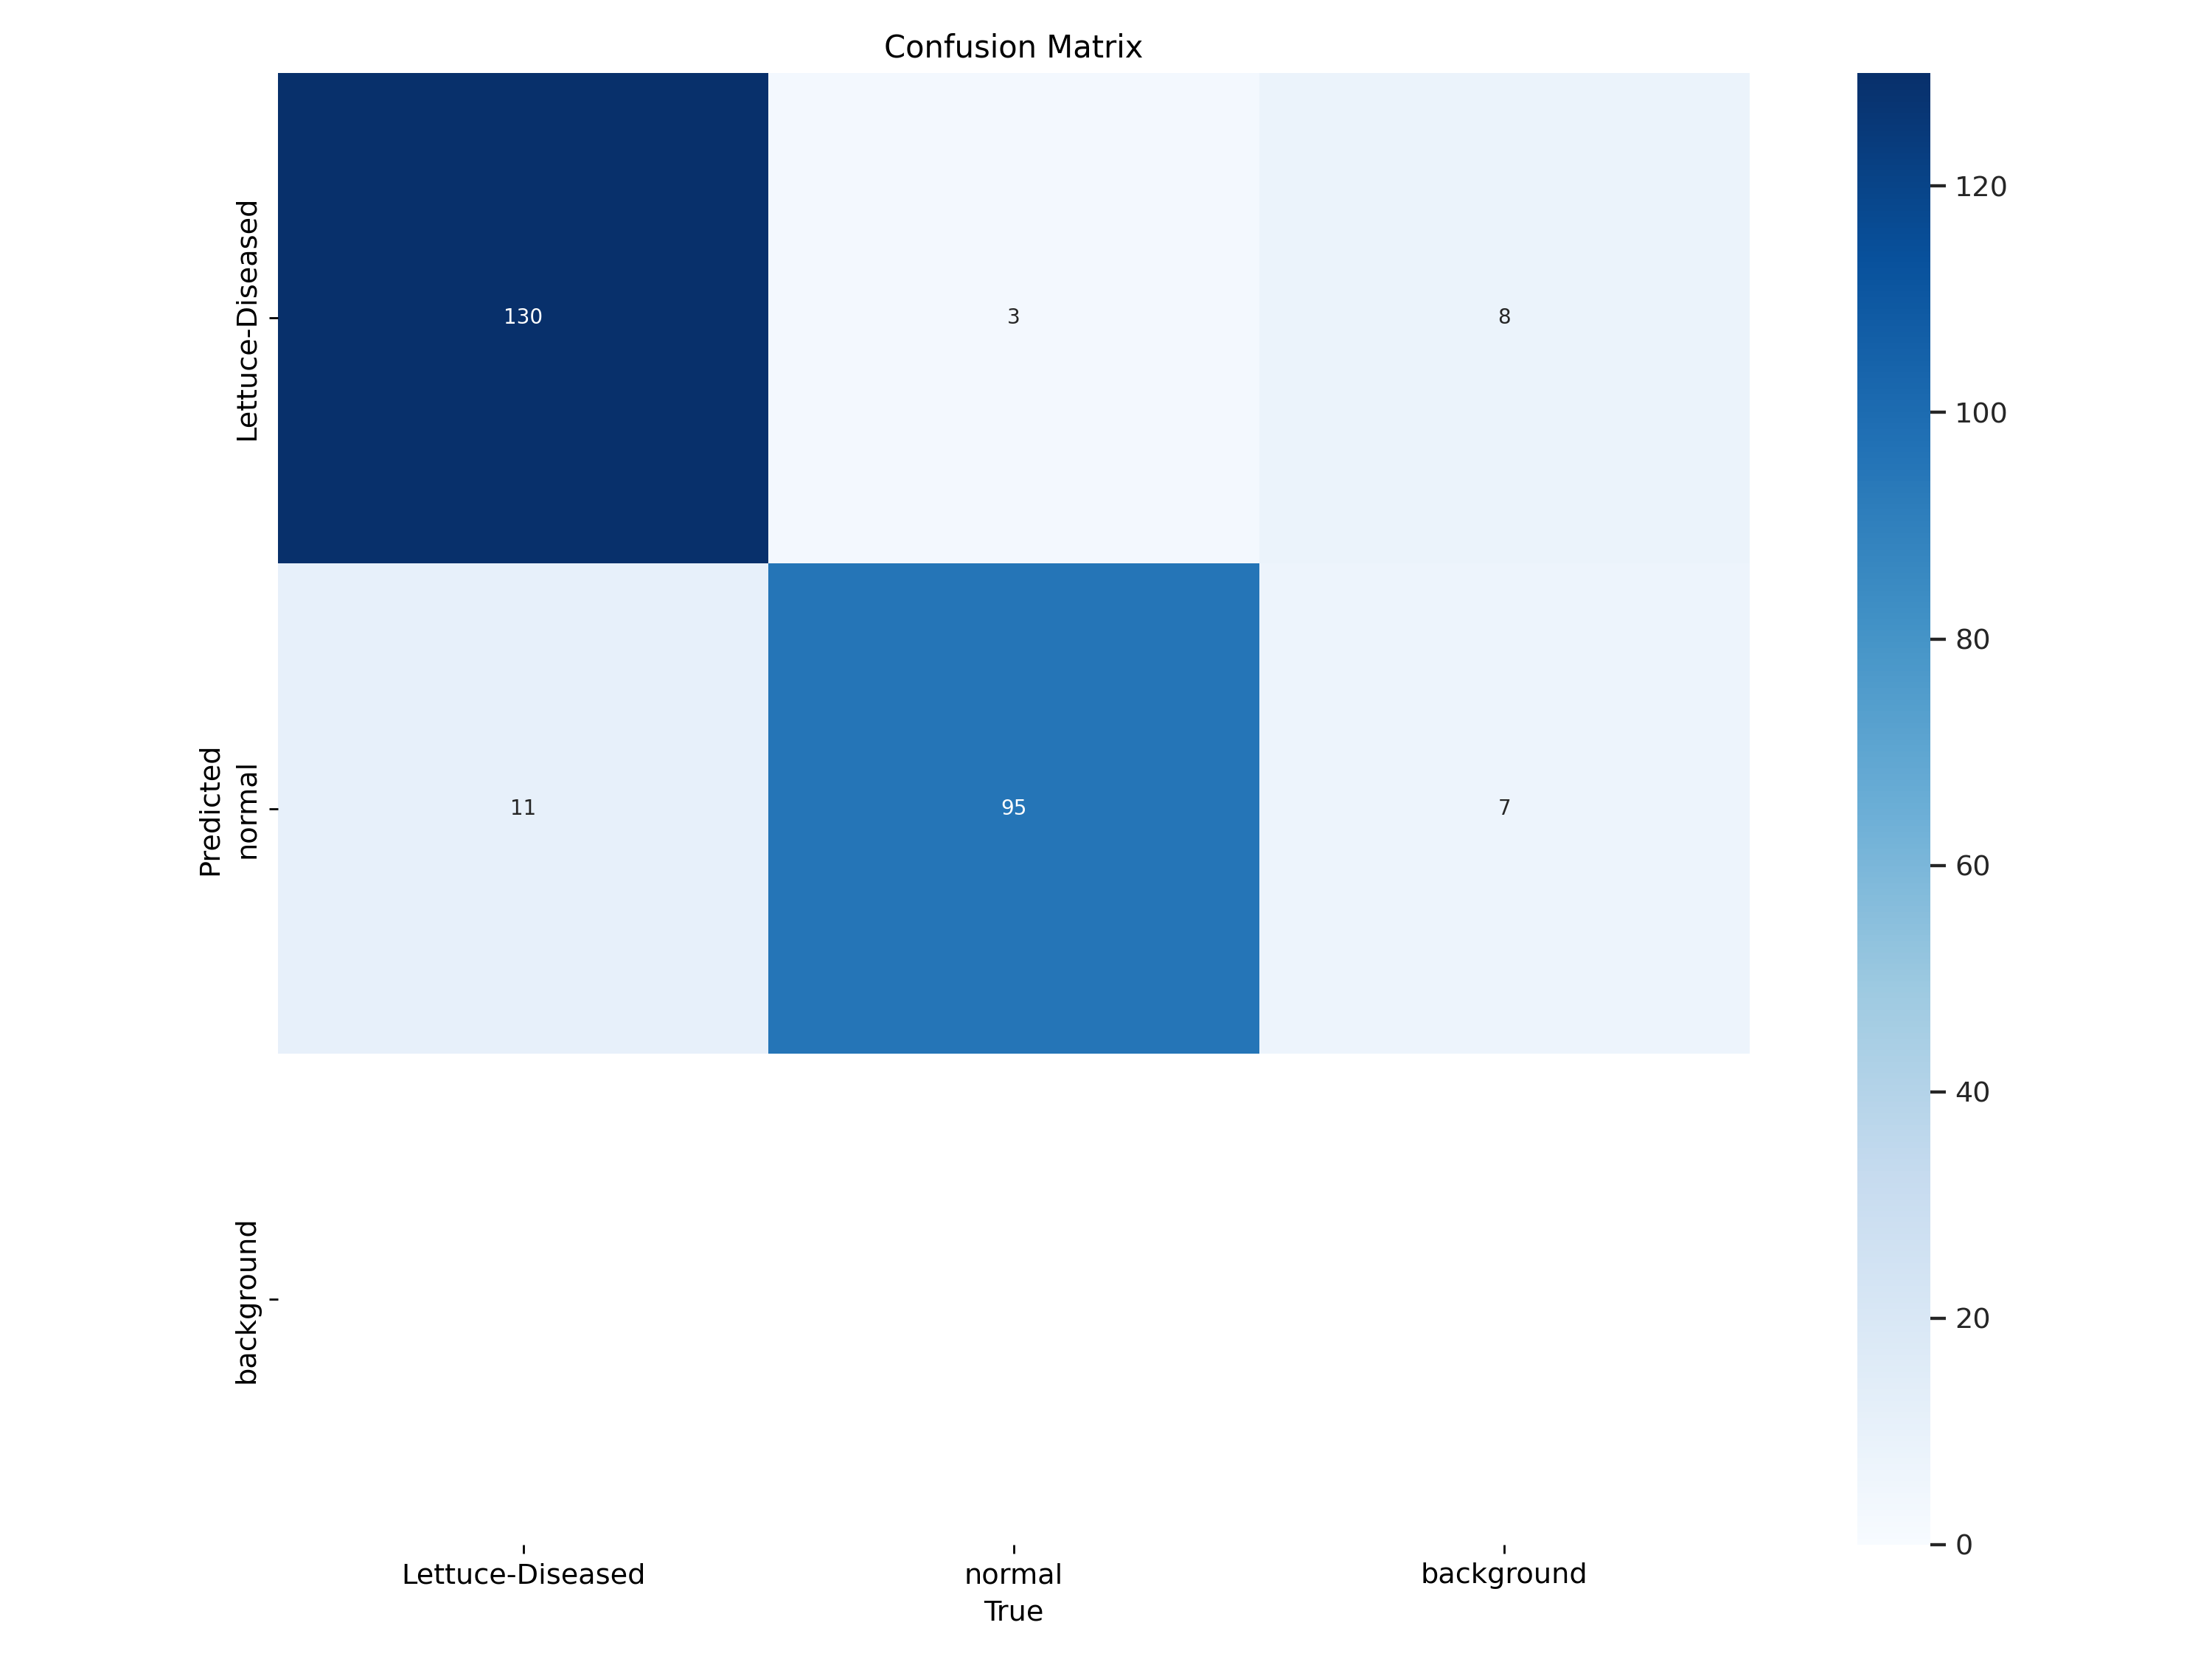

In [5]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


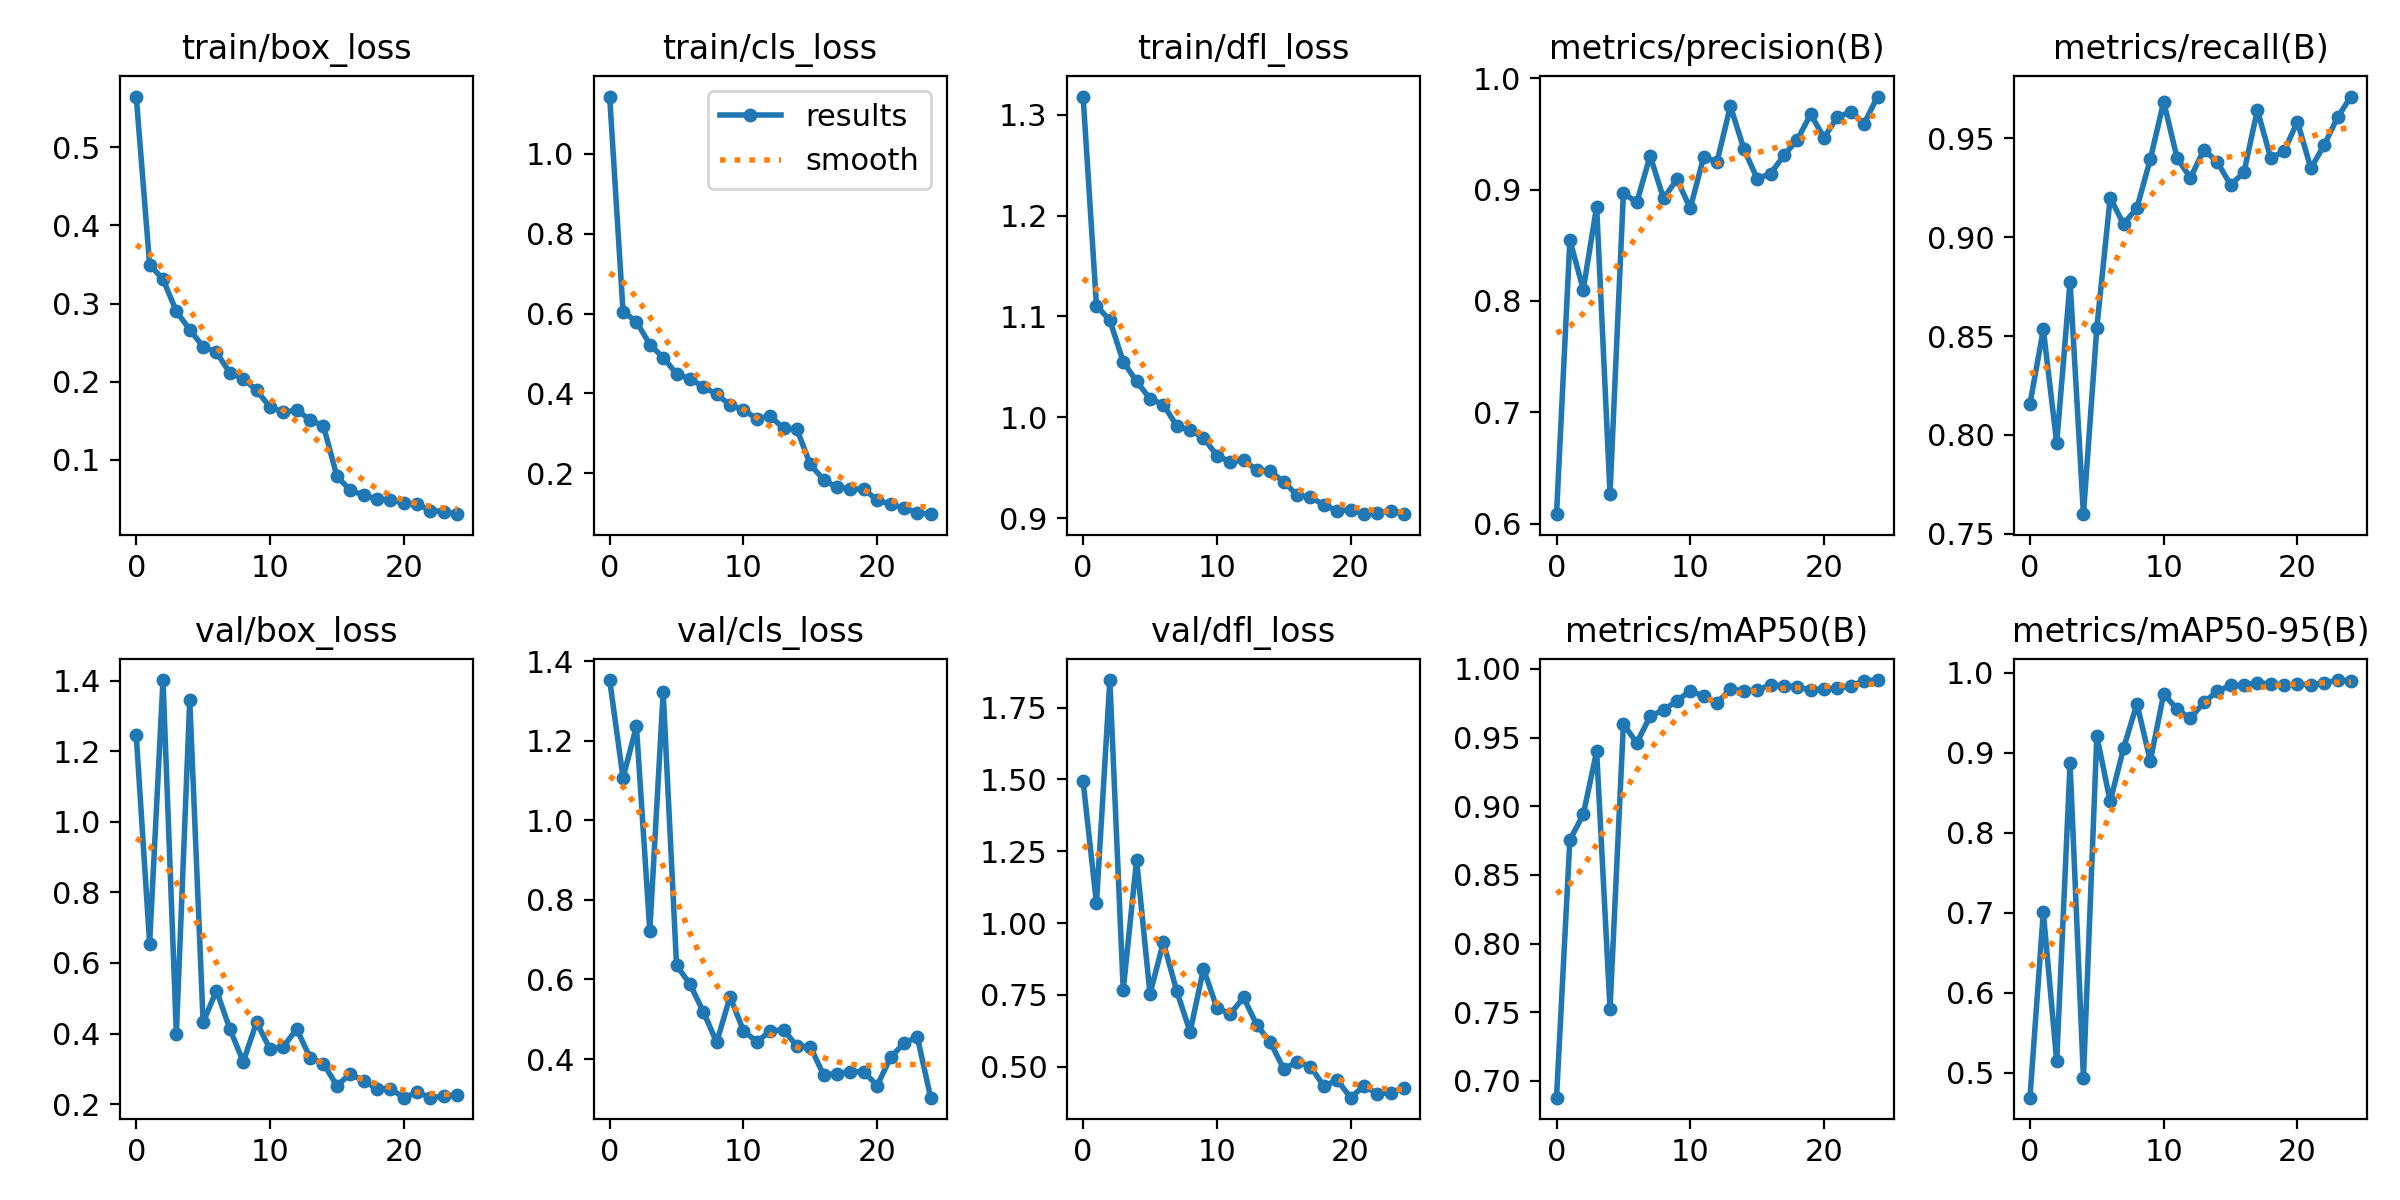

In [6]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


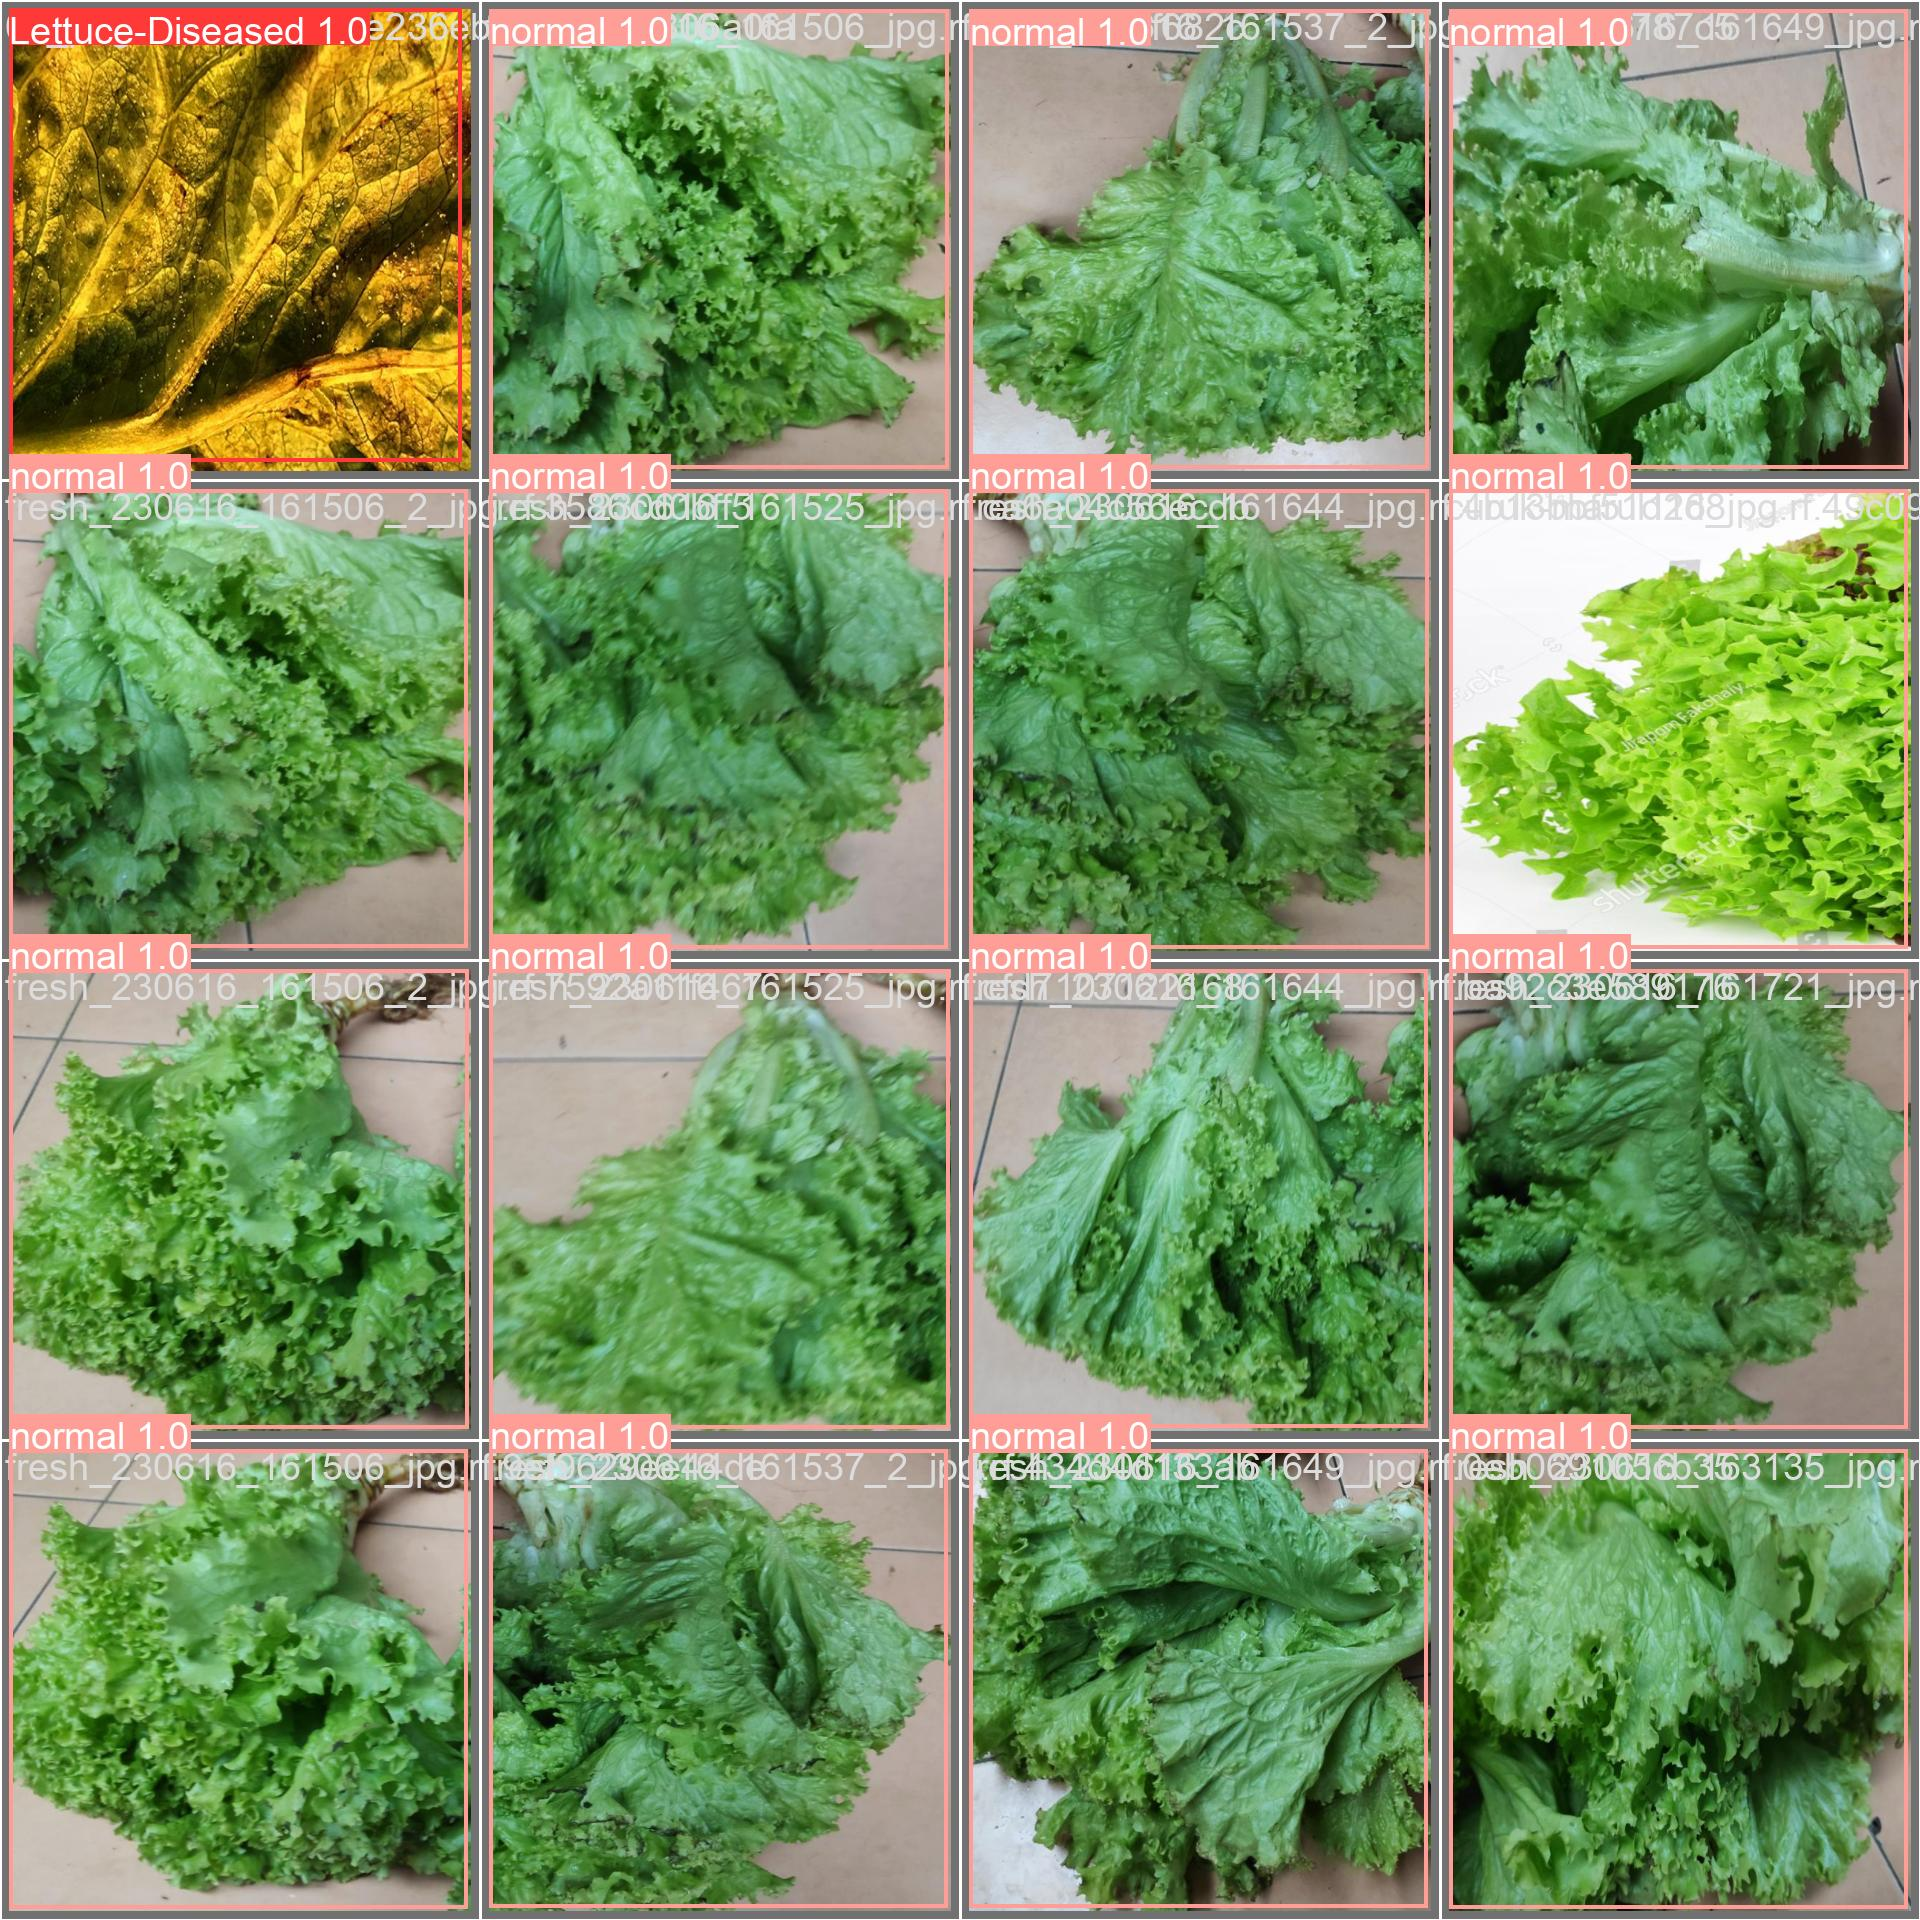

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

Step 4: Validate Custom Model

In [8]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients
val: Scanning /content/datasets/disease2-7/valid/labels.cache... 239 images, 0 backgrounds, 0 corrupt: 100% 239/239 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:10<00:00,  1.37it/s]
                   all        239        239      0.959      0.961      0.992      0.991
      Lettuce-Diseased        239        141      0.992      0.932      0.992      0.991
                normal        239         98      0.926       0.99      0.991      0.991
Speed: 5.0ms preprocess, 15.8ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to runs/detect/val


Step 5: Inference with Custom Model

In [9]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients

image 1/204 /content/datasets/disease2-7/test/images/01_jpg.rf.b3915cd04baf5135ee4fdcf191884171.jpg: 800x800 1 Lettuce-Diseased, 30.8ms
image 2/204 /content/datasets/disease2-7/test/images/02_jpg.rf.6eeb83a0a1fe9df564fdc508c7df967d.jpg: 800x800 1 Lettuce-Diseased, 24.6ms
image 3/204 /content/datasets/disease2-7/test/images/03_jpg.rf.2717e3191795d556f703dce92ee317c2.jpg: 800x800 1 Lettuce-Diseased, 24.5ms
image 4/204 /content/datasets/disease2-7/test/images/04_jpg.rf.2b324519ec7b70bc759a97c97f87a8b4.jpg: 800x800 1 Lettuce-Diseased, 24.6ms
image 5/204 /content/datasets/disease2-7/test/images/05_jpg.rf.7e1b3b6c8f15207adc515997f7b53da6.jpg: 800x800 1 Lettuce-Diseased, 24.6ms
image 6/204 /content/datasets/disease2-7/test/images/05_png.rf.39127027d4e96d3672f96c0917607ea5.jpg: 800x800 1 Lettuce-Diseased, 24.6ms
image 7/204 /conte

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [11]:
project.version(5).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/2-xx7t0/disease2-t4gyq/5/uploadModel?api_key=n4HERXqHARvwTX7ZB9kD&modelType=yolov8&nocache=true


In [15]:
#Raspberry code


from ultralytics import YOLO
import cv2
import time


model = YOLO('/content/runs/detect/train/weights/best.pt')

img = cv2.imread('/content/52_jpg.rf.0c78c16949f27b5451df87cc78e58875.jpg')

# First run to 'warm-up' the model
model.predict(source=img, save=False, save_txt=False, conf=0.5, verbose=False)

# Second run
t_start = time.monotonic()
results = model.predict(source=img, save=False, save_txt=False, conf=0.5, verbose=False)
dt = time.monotonic() - t_start
print("dT:", dt)

# Show results
boxes = results[0].boxes
names = model.names
print(names)
confidence, class_ids = boxes.conf, boxes.cls.int()
rects = boxes.xyxy.int()
for ind in range(boxes.shape[0]):
    print("Rect:", names[class_ids[ind].item()], confidence[ind].item(), rects[ind].tolist())



dT: 0.03848060800009989
{0: 'Lettuce-Diseased', 1: 'normal'}
Rect: normal 0.9928792119026184 [0, 0, 459, 460]
